In [1]:
import matplotlib.pylab as plt
import wntr  

Red original

In [19]:
wn = wntr.network.WaterNetworkModel('../nets_examples/Xicotepec_UAM_9.inp') 
wn.describe()

C:\Users\snake\anaconda3\envs\wdn\lib\site-packages\wntr\epanet\io.py:2173: UserWarning: Not all curves were used in "../nets_examples/Xicotepec_UAM_9.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


{'Nodes': 2048,
 'Links': 2125,
 'Patterns': 4,
 'Curves': 9,
 'Sources': 0,
 'Controls': 10}

Red esqueletizada

In [20]:
skel_wn = wntr.morph.skeletonize(wn, 12*0.0254)
skel_wn.describe()

{'Nodes': 365,
 'Links': 424,
 'Patterns': 4,
 'Curves': 9,
 'Sources': 0,
 'Controls': 10}

Graficas de ambas redes

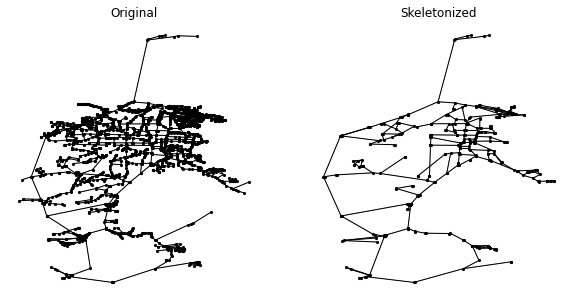

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
nodes, edges = wntr.graphics.plot_network(wn, node_size=10, title='Original',ax=ax1)
nodes, edges = wntr.graphics.plot_network(skel_wn, node_size=10,title='Skeletonized', ax=ax2)

Simulacion hidraulica de ambas redes

In [22]:
sim = wntr.sim.EpanetSimulator(wn)
results_original = sim.run_sim()

sim = wntr.sim.EpanetSimulator(skel_wn)
results_skel = sim.run_sim()

Computo de las diferencias de presión

In [23]:
skel_junctions = skel_wn.junction_name_list
pressure_orig = results_original.node['pressure'].loc[:,skel_junctions]
pressure_skel = results_skel.node['pressure'].loc[:,skel_junctions]
pressure_diff = (abs(pressure_orig - pressure_skel)/pressure_orig)*100
pressure_diff.index = pressure_diff.index/3600 # convert time to hours
#dataframe [97 rows x 1121 columns] - tiempo vs nodo
print(pressure_orig)
print(pressure_skel)
print(pressure_diff)

name       n_1010     n_1011      n_1012      n_1017     n_1018      n_102  \
0        4.706879  13.189236   80.849670   81.099792  49.962402  23.239286   
3600    42.608936  49.110020  121.393280  121.643402  91.554657  64.866585   
7200    43.064945  49.565880  121.849289  122.099411  92.010513  65.322449   
10800   42.345959  48.846893  121.131943  121.382065  91.291672  64.603462   
14400   10.299318  17.310883   50.849346   50.981148  58.564445  32.046860   
...           ...        ...         ...         ...        ...        ...   
590400   0.991682   7.475203   80.405869   80.655991  50.079082  23.348005   
594000   2.204185   8.687706   81.618370   81.868492  51.291588  24.560507   
597600   2.375188   8.869871   81.158043   81.408165  51.315178  24.626810   
601200   2.541652   9.036708   81.324287   81.574409  51.482014  24.793648   
604800  12.303438  18.802214   91.086296   91.336418  61.246998  34.558781   

name       n_1021     n_1022      n_106     n_1060  ...      n_

Calculo del 1er, 2do y 3er cuartil de diferencias de presión
Para cada hora de la simulación elige la presión en cada quartil

In [24]:
m25 = pressure_diff.quantile(0.25, axis=1)
m50 = pressure_diff.quantile(0.50, axis=1)
m75 = pressure_diff.quantile(0.75, axis=1)
# 97 rows x 2 columns - 0, 1... 96 -- 
#print(m25)
#print(m50)
#print(m75)

Ploteo de resultados

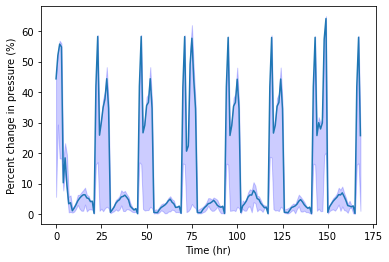

In [25]:
fig = plt.figure()
ax = m50.plot()
poly = ax.fill_between(m25.index, m25, m75, color='b', alpha=0.2)
text = ax.set_xlabel('Time (hr)')
text = ax.set_ylabel('Percent change in pressure (%)')

Ploteamos el percentil 0 de la presion en la red original

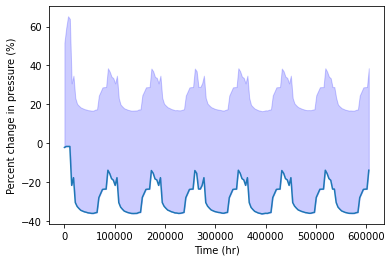

In [30]:
m0_or = pressure_orig.quantile(0, axis=1)
m50_or = pressure_orig.quantile(0.50, axis=1)
fig = plt.figure()
ax = m0.plot()
poly = ax.fill_between(m0_or.index, m0_or, m50_or, color='b', alpha=0.2)
text = ax.set_xlabel('Time (hr)')
text = ax.set_ylabel('pressure')

Imprimimos el valor del diametro

In [55]:
for link_name, link in wn.pipes():
    print(link.diameter)
    print(link.end_node)
print(len(wn.pipe_name_list))
print(wn.pipe_name_list)

0.050799999
n_10
0.050799999
n_100
0.050799999
n_1000
0.050799999
n_1001
0.050799999
n_1002
0.050799999
n_1003
0.050799999
n_1004
0.050799999
n_1006
0.0635
n_1450
0.050799999
n_1007
0.050799999
n_1008
0.050799999
n_1009
0.050799999
n_101
0.050799999
n_1010
0.050799999
n_1011
0.15239999399999998
n_1960
0.050799999
n_1013
0.07619999699999999
n_1563
0.050799999
n_1014
0.050799999
n_1016
0.050799999
n_620
0.050799999
n_1017
0.07619999699999999
n_1559
0.050799999
n_1019
0.038099998
n_1595
0.050799999
n_102
0.050799999
n_1350
0.050799999
n_1021
0.050799999
n_1023
0.050799999
n_1024
0.050799999
n_1026
0.050799999
n_1027
0.050799999
n_1028
0.050799999
n_1029
0.050799999
n_103
0.050799999
n_1030
0.050799999
n_1992
0.050799999
n_1032
0.050799999
n_1033
0.050799999
n_1034
0.050799999
n_1036
0.050799999
n_623
0.050799999
n_1037
0.050799999
n_1570
0.050799999
n_1039
0.050799999
n_104
0.050799999
n_1040
0.050799999
n_1041
0.050799999
n_1043
0.050799999
n_1244
0.050799999
n_1046
0.050799999
n_1047
0.

n_1556
0.050799999
n_911
0.07619999699999999
n_1557
0.07619999699999999
n_1558
0.07619999699999999
n_1017
0.07619999699999999
n_156
0.07619999699999999
n_1560
0.07619999699999999
n_1561
0.07619999699999999
n_1012
0.07619999699999999
n_1571
0.07619999699999999
n_1564
0.07619999699999999
n_1566
0.07619999699999999
n_1568
0.07619999699999999
n_1569
0.07619999699999999
n_157
0.07619999699999999
n_1570
0.050799999
n_1038
0.07619999699999999
n_1104
0.07619999699999999
n_1573
0.07619999699999999
n_1574
0.07619999699999999
n_1576
0.050799999
n_913
0.07619999699999999
n_1577
0.07619999699999999
n_1578
0.07619999699999999
n_1579
0.07619999699999999
n_158
0.07619999699999999
n_1580
0.07619999699999999
n_1581
0.07619999699999999
n_1582
0.07619999699999999
n_1583
0.07619999699999999
n_1584
0.07619999699999999
n_1587
0.07619999699999999
n_1584
0.07619999699999999
n_1589
0.101599998
n_1861
0.07619999699999999
n_159
0.07619999699999999
n_1591
0.07619999699999999
n_159
0.07619999699999999
n_1594
0.0761

0.050799999
n_504
0.050799999
n_477
0.050799999
n_520
0.050799999
n_478
0.050799999
n_479
0.050799999
n_48
0.050799999
n_481
0.050799999
n_480
0.050799999
n_482
0.050799999
n_484
0.050799999
n_483
0.050799999
n_501
0.050799999
n_487
0.050799999
n_5
0.050799999
n_49
0.050799999
n_490
0.050799999
n_488
0.050799999
n_492
0.050799999
n_493
0.050799999
n_494
0.050799999
n_497
0.07619999699999999
n_1546
0.050799999
n_498
0.050799999
n_499
0.15239999399999998
n_2026
0.050799999
n_491
0.050799999
n_50
0.050799999
n_500
0.050799999
n_486
0.050799999
n_502
0.050799999
n_503
0.050799999
n_504
0.050799999
n_507
0.050799999
n_508
0.050799999
n_509
0.050799999
n_51
0.050799999
n_510
0.050799999
n_511
0.050799999
n_512
0.050799999
n_513
0.050799999
n_514
0.050799999
n_516
0.050799999
n_517
0.050799999
n_518
0.050799999
n_519
0.050799999
n_52
0.050799999
n_476
0.050799999
n_521
0.050799999
n_522
0.050799999
n_524
0.050799999
n_526
0.050799999
n_528
0.050799999
n_527
0.050799999
n_655
0.050799999
n_529

Calculamos velocidad en las tuberias

In [51]:
velocity = results_original.link['velocity']
print(velocity)

name          T1        T2        T3        T4        T5        T6        T7  \
0       0.486916  0.486916  0.486916  0.486916  0.486916  0.486916  0.486916   
3600    0.130816  0.130816  0.130816  0.130816  0.130816  0.130816  0.130816   
7200    0.130854  0.130854  0.130854  0.130854  0.130854  0.130854  0.130854   
10800   0.130767  0.130767  0.130767  0.130767  0.130767  0.130767  0.130767   
14400   0.882207  0.882207  0.882207  0.882207  0.882207  0.882207  0.882207   
...          ...       ...       ...       ...       ...       ...       ...   
590400  0.000030  0.000030  0.000030  0.000030  0.000030  0.000030  0.000030   
594000  0.000105  0.000105  0.000105  0.000105  0.000105  0.000105  0.000105   
597600  0.131611  0.131611  0.131611  0.131611  0.131611  0.131611  0.131611   
601200  0.131580  0.131580  0.131580  0.131580  0.131580  0.131580  0.131580   
604800  0.131140  0.131140  0.131140  0.131140  0.131140  0.131140  0.131140   

name          T8        T9       T10  .